In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import datetime

import requests
import time
import re
import math
import numpy as np
import pandas as pd
import xlwt
import random
import os
from wordcloud import WordCloud
from PIL import Image
from wordcloud import STOPWORDS

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [2]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&sort=0&photo=0&field=0&pd=3&ds={}&de={}&cluster_rank=77&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{}to{},a:all&start={}'
url = url.format('국민청원', '2020.12.31', '2021.04.19', '20201231', '20200419', '1')

path = 'c:/paper/chromedriver.exe'
driver = webdriver.Chrome(path)

driver.get(url)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')


In [5]:
sources = soup.select('div.group_news > ul.list_news > li div.news_area > a')
print(sources)


[<a class="news_tit" href="http://www.newsis.com/view/?id=NISX20210419_0001411518&amp;cID=10201&amp;pID=10200" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=78&amp;i=88000127_000000000000000010454301&amp;g=003.0010454301&amp;u='+urlencode(this.href));" target="_blank" title='"여성도 군대 보내라"...국민청원 사흘만에 4만5000명 동의(종합)'>"여성도 군대 보내라"...<mark>국민청원</mark> 사흘만에 4만5000명 동의(종합)</a>, <a class="news_tit" href="http://www.fnnews.com/news/202104191130367873" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=83&amp;i=880000FF_000000000000000004623074&amp;g=014.0004623074&amp;u='+urlencode(this.href));" target="_blank" title="'여성 징병제' 청와대 국민청원 사흘만에 동의 5만명 돌파">'여성 징병제' 청와대 <mark>국민청원</mark> 사흘만에 동의 5만명 돌파</a>, <a class="news_tit" href="https://view.asiae.co.kr/article/2021041907424184280" onclick="return goOtherCR(this, 'a=nws*h.tit&amp;r=87&amp;i=88000385_000000000000000004887177&amp;g=277.0004887177&amp;u='+urlencode(this.href));" target="_blank" title='"여성도 징병하라" 靑 청원 사흘 만에 사전동의 4만명 넘어'>"여성도 징병

In [22]:
for i in range(0,10):
    tag_a = soup.find('div','group_news').find('ul', 'list_news').find_all('li', 'bx')[i].find('div','info_group').find_all('a')
    if len(tag_a) == 1:
        continue
    news_url_list.append(tag_a[1]['href'])

2
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010454301


In [3]:
SEARCH_WORD = '국민청원'
START_DATE = '2021.01.04'
END_DATE = '2021.04.19'
START_DATE_2 = '20210104'
END_DATE_2 = '20210419'

In [5]:
url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&sort=0&photo=0&field=0&pd=3&ds={}&de={}&cluster_rank=77&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from{}to{},a:all&start={}'

path = 'c:/paper/chromedriver.exe'
driver = webdriver.Chrome(path)

driver.get(url.format(SEARCH_WORD, START_DATE, END_DATE, START_DATE_2, END_DATE_2, '1'))

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

news_url_list = []

for i in range(1,400):
    driver.get(url.format(SEARCH_WORD, START_DATE, END_DATE, START_DATE_2, END_DATE_2, str(i*10+1)))
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    
    for i in range(0,10):
        tag_a = soup.find('div','group_news').find('ul', 'list_news').find_all('li', 'bx')[i].find('div','info_group').find_all('a')
        if len(tag_a) == 1:
            continue
        news_url_list.append(tag_a[1]['href'])
    time.sleep(2)
    
    
    


In [31]:
len(news_url_list)
len(content_list)

262

In [33]:
date = soup.find('div','group_news').find('ul', 'list_news').find_all('li', 'bx')[0].find('div','info_group').find('span','info').get_text()
date = date.replace('.', '')
date

'20210114'

In [6]:
f = open('news_url.txt', 'w', encoding='utf-8').close()

In [7]:
for i in news_url_list:
    f = open('news_url.txt','a', encoding='utf-8')
    f.write(i + '\n')
    f.close()

In [7]:
f = open('news_url.txt', 'r')

In [8]:
url_list = f.readlines()
f.close()
for i in range(0,len(url_list)):
    url_list[i] = url_list[i].replace('\n','')
url_list

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=311&aid=0001289084',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=030&aid=0002939843',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=025&aid=0003094254',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=029&aid=0002667945',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=088&aid=0000699074',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=028&aid=0002541030',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=421&aid=0005298218',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=018&aid=0004904193',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=144&aid=0000730998',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=018&aid=0004904560',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=009&aid=0004781478',
 'https://

In [9]:
news_url_list = url_list

In [10]:
content_list = []
title_list = []
date_list = []
print(str(datetime.today().hour) + ':' + str(datetime.today().minute))
for i in news_url_list:
    driver.get(i)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try:
        title = soup.find('div','article_info').find('h3','tts_head').get_text()
        content = soup.find('div', 'content').find('div','article_body _font_setting_target size3 font1').find('div', '_article_body_contents').get_text()
        content = content.replace("// flash 오류를 우회하기 위한 함수 추가", "")
        content = content.replace("function _flash_removeCallback() {}", "")
        date = soup.find('div','sponsor').find('span', 't11').get_text()[:12]
        date = date.replace(".", "")
    except:
        try:
            title = soup.find('div','end_ct_area').find('h2','end_tit').get_text()
            content = soup.find('div', 'end_ct').find('div','end_ct_area').find('div', 'article_body font1 size3').get_text()
            date = soup.find('div','article_info').find('span', 'author').find('em').get_text()[:12]
            date = date.replace(".", "")        
        except:
            title = soup.find('div','news_headline').find('h4','title').get_text()
            content = soup.find('div', 'content').find('div','content_area').find('div', 'news_end font1 size3').get_text()    
            date = soup.find('div','info').find_all('span')[0].get_text()[5:15]
            date = date.replace(".", "")  
    content_list.append(content)
    title_list.append(title)
    date_list.append(date)
    time.sleep(2)
    
print(str(datetime.today().hour) + ':' + str(datetime.today().minute))

18:25
20:35


In [15]:
driver.get('https://sports.news.naver.com/news.nhn?oid=421&aid=0005271683')
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [19]:
title = soup.find('div','news_headline').find('h4','title').get_text()
content = soup.find('div', 'content').find('div','content_area').find('div', 'news_end font1 size3').get_text()    
#content = content.replace("// flash 오류를 우회하기 위한 함수 추가", "")
#content = content.replace("function _flash_removeCallback() {}", "")
date = soup.find('div','info').find_all('span')[0].get_text()[5:15]
date = date.replace(".", "")
print(title)
print(content)
print(date)

"대구FC 고참이 폭행과 성추행" 국민청원…구단 "조속히 사실 규명할 것"

형이 폭로 "동생 성기 만지고 성적 수치심을 줬다"25일 오후 프로축구 하나원큐 K리그1 2020 대구FC와 포항스틸러스의 경기가 열리는 대구 북구 DGB대구은행파크 위로 파란 가을하늘과 흰구름이 조화를 이루고 있다. 2020.10.25/뉴스1 © News1 공정식 기자(서울=뉴스1) 안영준 기자 = 과거 프로축구 K리그1 대구FC에서 활동했던 선수가 같은 팀 고참 선수로부터 폭행과 성추행을 당했다는 국민 청원이 나왔다. 대구 구단 공식 입장문을 발표하고 빠른 시간 내 사실을 규명하겠다고 밝혔다. 6일 청와대 국민청원 게시판에는 "내 동생이 과거 대구에서 뛰던 시절 폭행과 성추행을 당했다"며 "내 동생은 이를 이기지 못해 간절하게 꿈꿨던 프로 선수를 그만두게 됐다"는 글이 올라왔다. 피해자의 형인 청원인은 "폭행과 성추행을 묵인한 대구 구단과 가해 선수의 정당한 처벌을 원한다"고 주장했다. 청원인은 "가해자는 현재 같은 지역 출신 구단 수뇌부가 운영하는 재단의 축구클럽에서 우수 지도자상까지 받고 있다"며 "화가 나고 어처구니가 없다"고 덧붙였다. 청원인이 진술하는 피해 사실은 꽤 구체적이다. 청원인은 "외출이나 외박을 못하게 하거나 중간에 들어오도록 했고, '고문을 받자'는 문자나 메신저를 보냈다"며 "문자를 캡처해 증거로 갖고 있다"고도 말했다. 폭행과 성추행도 주장했다. 청원인은 "가해자는 유리를 깨 정강이가 찢어지게 했고, 주먹으로 폭행하고 넘어뜨려 발로 밟았다"고 밝혔다. 또한 "취침 시간에 동생 옷을 벗긴 뒤 동생 룸메이트에게 드라이기를 이용해 손발을 묶으라고 지시했고, 동생 몸을 비하하면서 성기를 만지고 툭툭 치며 성적 수치심을 줬다"고 설명했다. 청원인은 "대구가 이 사실을 알고도 징계를 내리지 않았고, 동생과 가해자를 분리하지 않았다고 주장했다. 청원으로 큰 논란이 일자 대구는 같은 날 공식 입장문을 발표했다.  대구는 "국민청원에 올라온 전 소속 선수들 간의 불미스러운

In [11]:
naver_news_contents = pd.DataFrame()

naver_news_contents['title'] = pd.Series(title_list)
naver_news_contents['contents'] = pd.Series(content_list)
naver_news_contents['date'] = pd.Series(date_list)

naver_news_contents.to_csv('네이버 뉴스 데이터 셋.csv', encoding='utf-8-sig')
naver_news_contents.to_excel('네이버 뉴스 데이터 셋.xlsx', encoding='utf-8-sig')

In [2]:
naver = pd.read_excel("네이버 뉴스 데이터 셋.xlsx")

In [3]:
naver

,Unnamed: 0,title,contents,date
0,0,"\n\t\t\t함소원, 국민청원도 거짓? 단톡방 여론조작 의혹에 '허위사실' 반박 ...",\n이미지 원본보기\n[엑스포츠뉴스 황수연 기자] 방송인 함소원이 단톡방 회원을 동...,20210419
1,1,"조승래, 국회청원제도의 실효성을 제고해야…국회법 개정 발의",\n\n\n\n\n\n\n\n조승래 더불어민주당 의원조승래 더불어민주당 의원(대전 ...,20210419
2,2,"""왜 강원도에 작은 중국 만드나"" 차이나타운 철회 청원 57만",\n\n\n\n\n\n\n\n 사진 청와대 국민청원 강원도가 추...,20210417
3,3,분노의 국민청원… “여성도 남성처럼 징병하라”,"\n\n\n\n\n\n\n\n“나날이 줄어드는 출산율, 우리 군은 병력 보충에 큰 ...",20210418
4,4,"'강원도 차이나타운 철회' 청원 60만 동의…강원도 ""팩트체크 꼼꼼히 읽어 달라"" ...",\n\n\n\n\n\n\n\n강원도 '한중복합문화관광타운' 관련 설명 자료. 강원도...,20210419
...,...,...,...,...
2754,2754,취준생 죽음으로 몰고간 가짜 ‘김민수 검사’ 잡혔다,\n\n\n\n\n\n\n\n‘검사 사칭 목소리’ 40대 등전화금융사기범 5명 검거...,20210414
2755,2755,'2·18 기념공원' 명칭 병기 조례 개정 청원,\n\n\n\n동영상 뉴스\n\n\n\n\n\n\n\n\t\n\t대구지하철 참사를 ...,20210218
2756,2756,조선시대 수군 전투선 '판옥선'이 충북 '미래해양과학관'으로,\n\n\n\n\n\n\n\n총 사업비 1046억 투입…내륙지역 해양문화 체험장[서...,20210419
2757,2757,"경찰, 하동 ‘폭력·학대 서당’ 첫 압수수색",\n\n\n\n\n\n\n\n [앵커] 경찰이 폭력과 학대 의혹이 나온 경남 하동...,20210417


In [3]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ",
                 "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"',
                 "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta',
                 '∅': '', '³': '3', 'π': 'pi', } 
def clean_punc(text, punct, mapping):
    for p in mapping: 
        text = text.replace(p, mapping[p]) 
        
    for p in punct: 
        text = text.replace(p, f' {p} ') 
        
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''} 
    for s in specials:
        text = text.replace(s, specials[s])
        
    return text.strip()


In [4]:
def preprocessing(text):
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('(<([^>]+)>)', '', text)
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', text)
    return text

In [5]:
for i in range(0, len(naver)):
    naver['contents'][i] = clean_punc(naver['contents'][i], punct, punct_mapping)
    naver['contents'][i] = preprocessing(naver['contents'][i])
    naver['contents'][i] = naver['contents'][i].replace("청원", "")
    naver['contents'][i] = naver['contents'][i].replace("국민", "")

<ipython-input-5-309fec39871f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver['contents'][i] = clean_punc(naver['contents'][i], punct, punct_mapping)
<ipython-input-5-309fec39871f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver['contents'][i] = preprocessing(naver['contents'][i])
<ipython-input-5-309fec39871f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver['contents'][i] = naver['contents'][i].replace("청원", "")


In [10]:
print(naver['contents'][0])

이미지 원본보기    엑스포츠뉴스 황수연 기자    방송인 함소원이 단톡방 회원을 동원해 여론전을 펼치고 있다는 주장이 제기됐다    함소원은 해당 보도가 모두 스토커의 거짓 제보라고 반박했다      일 함소원은 자신의 인스타그램에         캡처 사진은         아내의 맛      톡방이다    이분들은 지난  개월 동안 저를 스토킹했으며 고소 중에도 디스패치에    방송국에 가짜 인터뷰로 저를 괴롭혔다    어제는 마지막 저를 탈탈 털어주겠다고 또 무서운 경고를 보내더니 디스패치가    기사를    썼다     고 주장했다    이어      참고로 우리 팬클럽 사진은 전부 제 사진이다    여러분 디엠   DM   으로      너를 끝내주겠다    손모가지를 걸고 너 끝이다     라고 세상에 처음 들어보는 협박을 매일 들었다    저는 연예인이니 여기서도 제가 잘못한 것이 될 것 같다     며      허위 사실을 기사로    방송으로 내지 말아달라    확인하고 내달라    부탁드린다     고 당부했다    이와 함께 함소원은      스토커     라고 주장하는 악플러의 메시지와      아내의 맛      톡 게시판의 캡처를 첨부했다    이날 디스패치는 이날 함소원이 소수 정예 팬들로 구성된    팬    단톡방에서 항의하기    전화하기    신고하기 등을 요청    여론전을 펼치고 있다고 단독 보도했다    보도에 따르면 함소원은 단톡방 구성원들에게 자신을 비판한 매체의 기자에게 항의 메일을 보내달라고 부탁하고    홈쇼핑 고객센터에 항의를 요청했다    심지어      함소원의 마녀사냥을 멈춰달라     는 청와대 국민청원도 단톡방을 통해서 게재됐다   한편 함소원은 TV조선      아내의 맛      조작 방송으로 불명예 하차했다         아내의 맛      프로그램은 함소원 논란으로 폐지됐다    이미지 원본보기 다음은 함소원 글 전문   여러분 보이십니까 여기는 아내의맛 톡방입니다 이분은들지난  개월동안 저를스토

In [6]:
def keyword_extractor(tagger, text):
    tokens = tagger.phrases(text)
    tokens = [ token for token in tokens if len(token) > 1 ] # 한 글자인 단어는 제외
    count_dict = [(token, text.count(token)) for token in tokens ]
    ranked_words = sorted(count_dict, key=lambda x:x[1], reverse=True)[:1]
    return [keyword for keyword, freq in ranked_words]

In [7]:
from konlpy.tag import Twitter
twit = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [59]:
keyword_extractor(twit,content)

flash오류를우회하기위한함수추가functionflashremoveCallback이데일리김민정기자방송인김어준씨를TBS교통방송에서퇴출해달라는국민청원이만명이상의동의를받았다일오후시기준김어준편파정치방송인교통방송에서퇴출해주세요라는제목의국민청원은만명이상이동의했다청원인은서울시교통방송은말그대로서울시의교통흐름을실시간파악해서혼란을막고자존재하는것이라며김어준은대놓고특정정당만지지하며그반대정당이나정당인은대놓고깎아내리며선거나정치에깊숙히관여하고있다고지적했다사진청와대국민청원게시판이어교체여론이들끓자차별이라며맞대응하고있다며교통방송이특정정당지지하는정치방송이된지오래인건만변질된교통방송을바로잡자는것이차별이냐고비판했다청와대는일동안만명이상의동의를얻은청원에대해정부및청와대관계자가일내공식답변을내놓도록하고있다뿐만아니라현재김씨의TBS출연료를두고도논란이일고있다국민의힘에서는김씨의회출연료가만원이에박원순전시장임기동안만출연료로억원에가까운금액을수령했을것이라고추정했다여기에TBS가김씨와계약서를작성하지않고구두계약만으로출연료를지급했고김씨개인이아닌김씨가만든인법인에출연료를지급해세금을탈루했다는논란도불거졌다이후TBS측은직접보도자료를내고문제가없다며반박했다뿐만아니라김씨가TBS출연료를입금받을목적으로회사를설립해개인종합소득세가아닌법인세율을적용해세금을줄이고있다는의혹도부인했다이와관련해김씨도방송을통해중요한건불법탈루나최소한편법적인절세시도가있었냐는것인데저는출연료를한푼도빠짐없이종합소득세로신고했으며탈루혹은절세시도가원도없다고주장했다그는매우불쾌한듯공직자도아닌데개인계좌를들추나오버들하지말라며그에너지로내곡동이나엘시티취재를하시길부탁드린다고도했다김민정aedailycokr시간빠른미리보는뉴스eNews네이버에서이데일리뉴스를만나보세요빡침해소청춘뉘우스스냅타임종합경제정보미디어이데일리무단전재재배포금지


['방송']

In [8]:
keyword_list = []
for i in naver['contents']:
    keyword_list.append(str(keyword_extractor(twit, i)))

keyword_news = pd.DataFrame(keyword_list, columns = ['Keyword'])



In [9]:
for i in range(0,len(keyword_list)):
    keyword_list[i] = keyword_list[i].replace("'", "")
    keyword_list[i] = keyword_list[i].replace("[", "")
    keyword_list[i] = keyword_list[i].replace("]", "")

In [11]:
for i in range(0,len(keyword_news)):
    keyword_news['Keyword'][i] = keyword_news['Keyword'][i].replace("'", "")
    keyword_news['Keyword'][i] = keyword_news['Keyword'][i].replace("[", "")
    keyword_news['Keyword'][i] = keyword_news['Keyword'][i].replace("]", "")

In [10]:
naver['keyword'] = pd.Series(keyword_list)
naver.to_excel('네이버 뉴스 데이터 셋2.xlsx', encoding='utf-8-sig')

In [11]:
cloud_data = naver['keyword'].value_counts()

In [12]:
cloud_data[:20]

윤정희    93
방송     74
경찰     74
동물     62
학대     58
중국     48
아이     44
함소원    42
교사     41
뉴스     38
조두순    33
A씨     33
공매도    33
의사     31
알페스    29
설강화    29
병원     27
YTN    27
백신     27
선수     26
Name: keyword, dtype: int64

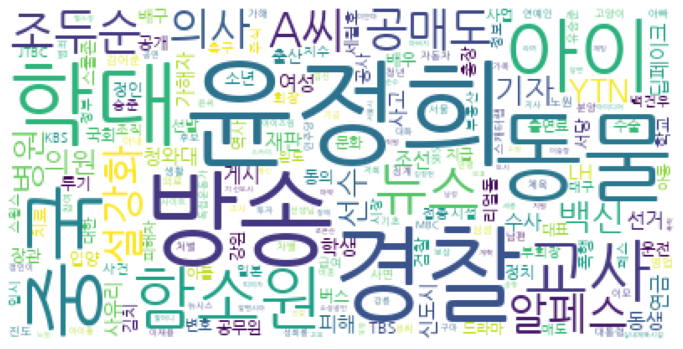

In [14]:
font_path = 'c:\\windows\\fonts\\NanumGothic.ttf'
wordcloud = WordCloud(
     font_path = font_path,
    background_color='white'
    )

wordcloud = wordcloud.generate_from_frequencies(cloud_data)

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
fig.savefig('네이버 뉴스기사 워드클라우드.png')